### Use station mapping tool to map grids to station
1. Create a dictionary to configure the station mapping tool inputs and parameters.
    <br>The three parameters are criterias used to find optimum/ best-match grid. 
2. Call and apply the imported python station mapping tool with the configured input.
    <br>This willgenerate the dataframe containing station-grid locations following nearest neighbor approach ("near_grid") and the newly found best-match grid ("new_grid") 

In [1]:
from hat.mapping.station_mapping import station_mapping

# 1.  a configuration dictionary
config = {
    # Netcdf information
    "upstream_area_file": "/home/dadiyorto/freelance/02_ort_ecmwf/dev/hat/hat/mapping/upArea.nc", #file path

    # Station Metadata CSV information
    "csv_file": "/home/dadiyorto/freelance/02_ort_ecmwf/dev/hat/hat/mapping/outlets.csv", #file path
    "csv_lat_col": "StationLat", # column name for latitude (string)
    "csv_lon_col": "StationLon", # column name for longitude (string)
    "csv_station_name_col": "StationName", # column name for station  (string)
    "csv_ups_col": "DrainingArea.km2.Provider", # column name for metadata of upstream  (string)

    # Mapping parameters (3x)
    "max_neighboring_cells": 5, # Parameter 1: maximum radius to search for best cells (no. of cells)  
    "max_area_diff": 20, # Parameter 2: acceptable/ optimum upstream area difference (%)
    "min_area_diff": 0, # Parameter 3: minimum upstream area difference (%) between nearest grid and the station metadata

    # manual mapping as reference for evaluation (optional)
    "manual_lat_col": "LisfloodY",  # column name for latitude of manually mapped station (string)
    "manual_lon_col": "LisfloodX", # column name for longitude of manually mapped station (string)
    "manual_area": "DrainingArea.km2.LDD", # column name for area of manually mapped station (string)

    # Output directory to save the outputs (geojson and csv)
    "out_directory": "/home/dadiyorto/freelance/02_ort_ecmwf/dev/hat/hat/mapping/output"
}

# 2. Call the station mapping function with the config dictionary
df = station_mapping(config)


### Evaluate the station mapping output
#### 1. evaluate between manual mapping and nearest grid approach

Count of perfect mapping rows with distance within 0.008333333333333333 decimal degrees: 2566 / 3683
Count of rows with absolute error % between manual_area and near_grid_area in the range of (0%, 20%): 2884 / 3697
Mean Abs. Error (MAE) % between manual_area and near_grid_area: 149.33%


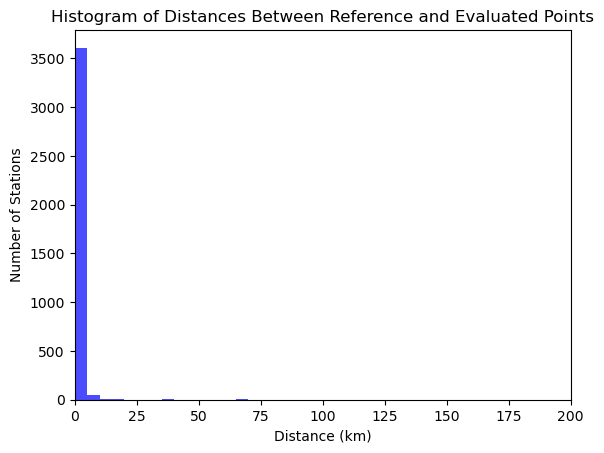

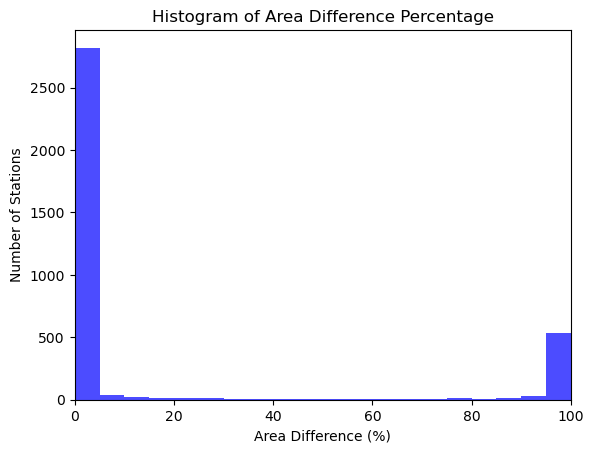

In [2]:
from hat.mapping.evaluation import calculate_mae, count_within_abs_error_range, count_perfect_mapping, plot_distance_histogram, plot_area_error_histogram

# Evaluation between manual mapping and nearest grid

# Evaluation histogram between manual mapping and nearest grid distance
dist_interval = 5 # interval for distance histogram
max_distance = 200 # max distance (x axis) of distance histogram
fig1 = plot_distance_histogram(df, 'manual_lat', 'manual_lon', 'near_grid_lat', 'near_grid_lon', dist_interval, max_distance=max_distance)

# Evaluation histogram between manual mapping and nearest grid area difference
area_diff_interval = 5 # interval for area difference histogram
max_area_error = 100 # max area error (x axis) of area difference histogram
fig2 = plot_area_error_histogram(df, 'manual_area', 'near_grid_area', area_diff_interval, max_area_error = max_area_error)

# Count number of stations with perfect mapping 
tolerance_degrees =1/60/2 # half arc min as the tolerance for perfect mapping
perfect_mapping_count = count_perfect_mapping(df, 'manual_lat', 'manual_lon', 'near_grid_lat', 'near_grid_lon', tolerance_degrees)

# Count number of stations with area difference within acceptable error margin
error_margin = 20 # acceptable error margin for area difference
acceptable_count = count_within_abs_error_range(df, 'manual_area', 'near_grid_area', lower_limit=0 , upper_limit=error_margin)

# Calculate Mean Absolute Error (MAE) between manual mapping and nearest grid
mae = calculate_mae(df, 'manual_area', 'near_grid_area')

#### 2. evaluate between manual mapping and best-match grid

Count of perfect mapping rows with distance within 0.008333333333333333 decimal degrees: 2566 / 3683
Count of rows with absolute error % between manual_area and near_grid_area in the range of (0%, 20%): 2884 / 3697
Mean Abs. Error (MAE) % between manual_area and near_grid_area: 149.33%


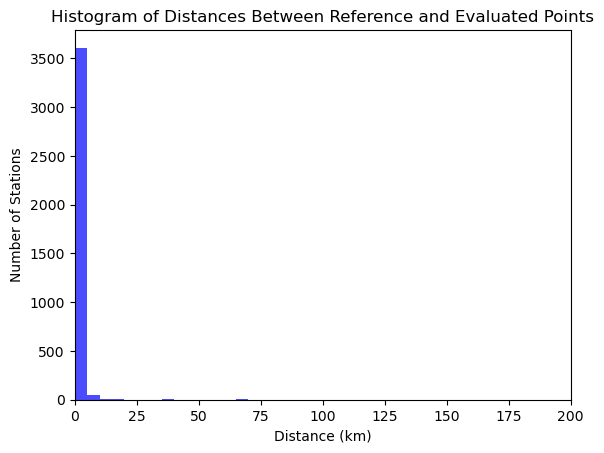

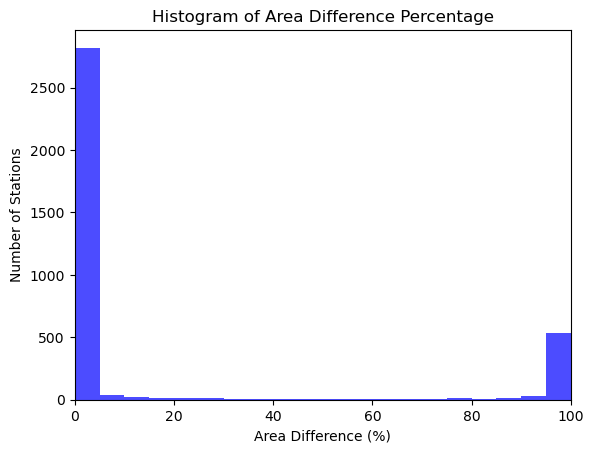

In [3]:
# Evaluation between manual mapping and best match grid (same parameter as nearest)

# Evaluation histogram between manual mapping and nearest grid distance 
fig1 = plot_distance_histogram(df, 'manual_lat', 'manual_lon', 'near_grid_lat', 'near_grid_lon', dist_interval, max_distance=max_distance)

# Evaluation historgram between manual mapping and nearest grid area 
fig2 = plot_area_error_histogram(df, 'manual_area', 'near_grid_area', area_diff_interval, max_area_error = max_area_error)

# Count number of stations with perfect mapping 
perfect_mapping_count = count_perfect_mapping(df, 'manual_lat', 'manual_lon', 'near_grid_lat', 'near_grid_lon', tolerance_degrees)

# Count number of stations with area difference within acceptable error margin
acceptable_count = count_within_abs_error_range(df, 'manual_area', 'near_grid_area', lower_limit=0 , upper_limit=error_margin)

# Calculate Mean Absolute Error (MAE) between manual mapping and nearest grid
mae = calculate_mae(df, 'manual_area', 'near_grid_area')